In [9]:
!pip install tensorflow
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     -------------------------------------- 60.6/60.6 kB 799.0 kB/s eta 0:00:00
  Using cached joblib-1.4.0-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 3.2 MB/s eta 0:00:04
    --------------------------------------- 0.2/10.6 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.3/10.6 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.4/10.6 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/10.6 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/10.6 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/10.6 MB 2.2 MB/s eta 0:00:05
   --- ------------------------

In [10]:
# If load_boston does not work then download the data and use this.
# Data : https://github.com/afnan47/sem8/blob/master/DL/1_boston_housing.csv
import pandas as pd
df = pd.read_csv('./HousingData.csv')

In [11]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [12]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

C:\Users\sumit\anaconda3\envs\lpv_boston\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_output (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 608.0248 - mae: 22.7380 - val_loss: 638.5320 - val_mae: 23.4113
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 583.6537 - mae: 22.4326 - val_loss: 635.9724 - val_mae: 23.3565
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 584.7766 - mae: 22.4482 - val_loss: 633.0811 - val_mae: 23.2946
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 606.4216 - mae: 22.7828 - val_loss: 629.7821 - val_mae: 23.2236
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 584.7215 - mae: 22.4512 - val_loss: 626.0084 - val_mae: 23.1423
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 596.7829 - mae: 22.6048 - val_loss: 621.7116 - val_mae: 23.0492
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 540.8008 - mae: 21.6009 - val_loss: 616.8945 - val_mae: 22.9445
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 572.4352 - mae: 22.1635 - val_loss: 611.4682 - val_mae: 22.8259
Epoch 9/100
11/

In [15]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 94.7499 - mae: 7.1640  
Mean squared error on test data:  81.13472747802734
Mean absolute error on test data:  6.6192731857299805


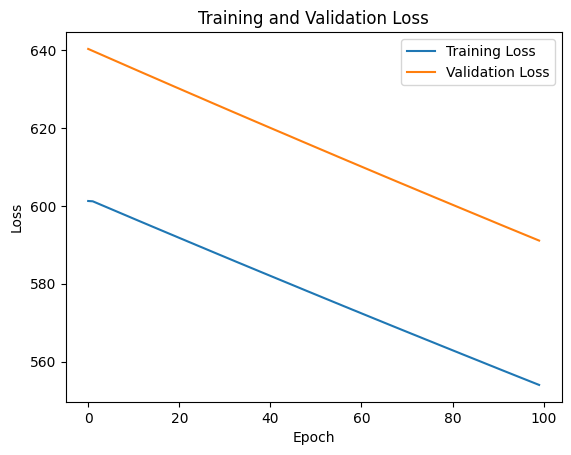

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

